Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.

In [1]:
import scipy.stats as stat
import numpy as np

#given data

sample_mean = 50
sample_size = 40
sample_std = 5
alpha = 0.05

#calculating se

se = sample_std/(np.sqrt(sample_size))

#calculation of t value
df = sample_size -1
t_value = stat.t.ppf(1-0.05/2, df)

#calculating margin of error
me = t_value * se

lower_bound = sample_mean - me
upper_bound = sample_mean + me

print('t_value is,',t_value)
print('margin of error is,', me)
print('Lower bound = ', lower_bound)
print('Upper bound = ', upper_bound)
print(f'The confidence interval is ({lower_bound},{upper_bound})')

t_value is, 2.022690911734728
margin of error is, 1.5990775709010854
Lower bound =  48.40092242909891
Upper bound =  51.59907757090109
The confidence interval is (48.40092242909891,51.59907757090109)


Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.

In [9]:
import scipy.stats as stat
import numpy as np

#given data
observed_data = np.array([10, 20, 15, 5, 5, 15])
expected_data = np.array([0.20, 0.20, 0.20, 0.10, 0.10, 0.20]) *  np.sum(observed_data)

#null and alternate hypotheis
null_hypo = 'The distribution of colors of M&Ms in a bag matches the expected distribution'
alternate_hypo = 'The distribution of colors of M&Ms in a bag does not match the expected distribution'
#chi square goodness of fit test

chisquare_test_statistic, p_value = stat.chisquare(observed_data, expected_data)
print(chisquare_test_statistic), print(p_value)

#finding critical value

signi_level = 0.05
dof = len(observed_data)-1
critical_value = stat.chi2.ppf(1-signi_level, dof)
print(critical_value)

if p_value<alpha:
    print('Reject the null hypothesis')
    print(alternate_hypo)
else:
    print('Failed to reject the null hypothesis')
    print(null_hypo)


5.0
0.4158801869955079
11.070497693516351
Failed to reject the null hypothesis
The distribution of colors of M&Ms in a bag matches the expected distribution


Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
data:

Outcome 1 20 15
Outcome 2 10 25
Outcome 3 15 20

Interpret the results of the test.

In [8]:
import scipy.stats as stats
import pandas as pd

ob_df = pd.DataFrame({'Group A':[20,10,15], 'Group B':[15,25,20]})
ob_df.index = ['Outcome1', 'Outcome2', 'Outcome3']
print('Observed Dataframe is below')
print(ob_df)

#null and alternate hypothesis
null_hypothesis = 'The outcomes are independent of the groups'
alternate_hypothesis = 'The outcomes are dependent on the groups'

#calculating chisquare statistic and p-value
stat, p, dof, expected = stats.chi2_contingency(ob_df)

#expected df
expected_df = pd.DataFrame(expected)
expected_df.index = ['Outcome1', 'Outcome2', 'Outcome3']
expected_df.columns = ['Group A', 'Group B']
print('Expected values Dataframe')
print(expected_df)

# Print the results
print("\nChi-square statistic:", stat)
print("p-value:", p)

# Significance 
alpha = 0.05 

if p<alpha:
    print('Reject the null hypothesis')
    print(alternate_hypothesis)
else:
    print('Failed to reject the null hypotheis')
    print(null_hypothesis)

Observed Dataframe is below
          Group A  Group B
Outcome1       20       15
Outcome2       10       25
Outcome3       15       20
Expected values Dataframe
          Group A  Group B
Outcome1     15.0     20.0
Outcome2     15.0     20.0
Outcome3     15.0     20.0

Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158
Failed to reject the null hypotheis
The outcomes are independent of the groups


Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
population who smoke.

In [2]:
import scipy.stats as stat
import numpy as np

#given data
n = 500 #sample size
x = 60 #no. of individuals who smoke
alpha  = 0.05
p = x/n # proportion of individuals who smoke 

#calculating z value
z = stat.norm.ppf(1-alpha/2)

#calculating se of proportion 
se = np.sqrt((p * (1-p))/n)

#calculating CI
lower_bound = p-(z*se)
upper_bound = p+(z*se)

print(f'The CI is = ({lower_bound*100}, {upper_bound*100})')

The CI is = (9.151638887130707, 14.848361112869291)


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

In [4]:
import scipy.stats as stat
import numpy as np

#given data
x = 75 
std_dv = 12
alpha  = 0.10
n = 30 #assumed

#calculating z value
z = stat.norm.ppf(1-alpha/2)

#calculating se of proportion 
se = np.sqrt(std_dv/n)

#calculating CI
lower_bound = x - (z*se)
upper_bound = x + (z*se)

print(f'The CI is = ({lower_bound}, {upper_bound})')

The CI is = (73.95970322424888, 76.04029677575112)


Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
area corresponding to a chi-square statistic of 15.

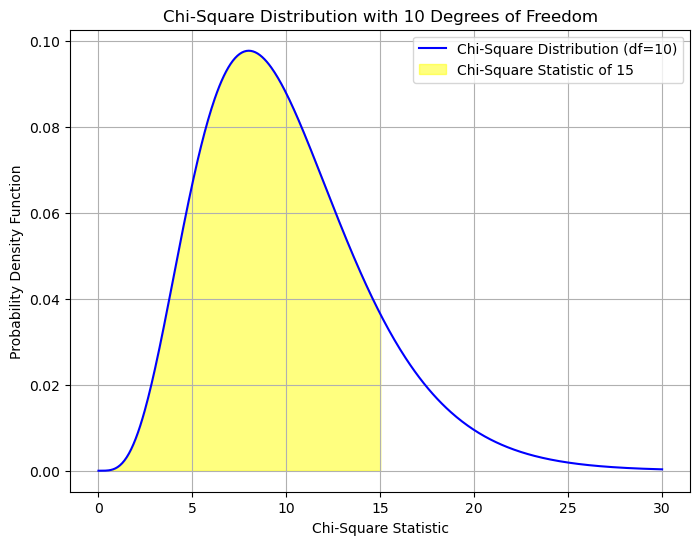

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the degrees of freedom
df = 10

# Generate x values for the chi-square distribution
x = np.linspace(0, 30, 500)

# Calculate the probability density function (PDF) for the chi-square distribution
pdf = stats.chi2.pdf(x, df)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'b-', label=f'Chi-Square Distribution (df={df})')

# Shade the area corresponding to a chi-square statistic of 15
x_fill = np.linspace(0, 15, 100)
pdf_fill = stats.chi2.pdf(x_fill, df)
plt.fill_between(x_fill, pdf_fill, color='yellow', alpha=0.5, label='Chi-Square Statistic of 15')

# Add labels and title
plt.title('Chi-Square Distribution with 10 Degrees of Freedom')
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

In [2]:
import scipy.stats as stat
import numpy as np

#given data
n = 1000 #sample size
x = 520 #no. of individuals who prefer coke
alpha  = 0.01
p = x/n # proportion of individuals who smoke 

#calculating z value
z = stat.norm.ppf(1-alpha/2)

#calculating se of proportion 
se = np.sqrt((p * (1-p))/n)

#calculating CI
lower_bound = p-(z*se)
upper_bound = p+(z*se)

print(f'The CI is = ({lower_bound*100}, {upper_bound*100})')

The CI is = (47.93051576779699, 56.06948423220302)


Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

In [4]:
import scipy.stats as stat

observed_freq = [45,55]
expected_freq = [50,50]

null_hypothesis = 'The coin is fair'
alternate_hypo = 'The coin is not fair'
 
chisquare_statistic, p_value = stat.chisquare(observed_freq, expected_freq)
print('chisquare_statistic = ', chisquare_statistic)
print('P_value = ', p_value)

alpha = 0.05

if p_value < alpha:
    print('Reject the null Hypothesis')
    print(alternate_hypo)
else:
    print('We failed to reject the null hypothesis')
    print(null_hypothesis)

chisquare_statistic =  1.0
P_value =  0.31731050786291115
We failed to reject the null hypothesis
The coin is fair


Q9. A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

Use a significance level of 0.05.

Lung Cancer:Yes	Lung Cancer:No
Smoker	60	140
Non Smoker	30	170

In [5]:
import scipy.stats as stat
import pandas as pd

observed_df = pd.DataFrame({'Lung Cancer: Yes': [60, 30], 'Lung Cancer:No':[140,170]})
observed_df.index = ['Smoker', 'Non-Smoker']
print('Observed Dataframe is as below')
print(observed_df)

#null and alternate hypothesis
null_hypo = 'There is no significant association between smoking status and lung cancer diagnosis'
alternate_hypo = 'There is significant association between smoking status and lung cancer diagnosis'
'Lung Cancer: Yes'
#calculating statistic, p, df, expected 
chisquare_stat, p, df, expected = stat.chi2_contingency(observed_df)

#expected df
expected_df = pd.DataFrame(expected)
expected_df.index = ['Smoker', 'Non-Smoker']
expected_df.columns = ['Lung Cancer: Yes', 'Lung Cancer:No']
print('Expected Dataframe is as below')
print(expected_df)

#print results
print('Chi square statistic = ', chisquare_stat)
print('P value = ', p)

#significance
alpha = 0.05

if p<alpha:
    print('Reject the null hypothesis')
    print(alternate_hypo)
else:
    print('We failed to reject the null hypothesis')
    print(null_hypo)      

Observed Dataframe is as below
            Lung Cancer: Yes  Lung Cancer:No
Smoker                    60             140
Non-Smoker                30             170
Expected Dataframe is as below
            Lung Cancer: Yes  Lung Cancer:No
Smoker                  45.0           155.0
Non-Smoker              45.0           155.0
Chi square statistic =  12.057347670250895
P value =  0.0005158863863703744
Reject the null hypothesis
There is significant association between smoking status and lung cancer diagnosis


Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
contingency table below. Conduct a chi-square test for independence to determine if there is a significant
association between chocolate preference and country of origin.

Use a significance level of 0.01.

	Milk Chocolate	Dark Chocolate	White Chocolate
U.S. (n=500)	200	150	150
U.K. (n=500)	225	175	100

In [7]:
import scipy.stats as stat
import pandas as pd

observed_df = pd.DataFrame({'Milk Chocolate': [200,225], 'Dark chocolate':[150,170], 'White chcoclate':[150,100]})
observed_df.index = ['U.S. (n=500)', 'U.K. (n=500)']
print('Observed Dataframe is as below')
print(observed_df)

#null and alternate hypothesis
null_hypo = 'There is no significant association between chocolate preference and country of origin'
alternate_hypo = 'There is significant association between chocolate preference and country of origin'

#calculating statistic, p, df, expected 
chisquare_stat, p, df, expected = stat.chi2_contingency(observed_df)

#expected df
expected_df = pd.DataFrame(expected)
expected_df.index = ['U.S. (n=500)', 'U.K. (n=500)']
expected_df.columns = ['Milk Chocolate', 'Dark chocolate', 'White chcoclate']
print('Expected Dataframe is as below')
print(expected_df)

#print results
print('Chi square statistic = ', chisquare_stat)
print('P value = ', p)

#significance
alpha = 0.01

if p<alpha:
    print('Reject the null hypothesis')
    print(alternate_hypo)
else:
    print('We failed to reject the null hypothesis')
    print(null_hypo)      

Observed Dataframe is as below
              Milk Chocolate  Dark chocolate  White chcoclate
U.S. (n=500)             200             150              150
U.K. (n=500)             225             170              100
Expected Dataframe is as below
              Milk Chocolate  Dark chocolate  White chcoclate
U.S. (n=500)      213.567839       160.80402       125.628141
U.K. (n=500)      211.432161       159.19598       124.371859
Chi square statistic =  12.695783199643499
P value =  0.001750433863416934
Reject the null hypothesis
There is significant association between chocolate preference and country of origin


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

In [10]:
import scipy.stats as stat
import numpy as np

#given data
sample_mean = 72
sample_std = 10
n = 30
pop_mean = 70

#null and alternate hypothesis
null_hypo = 'The population mean is not different from 70'
alternate_hypo = 'The population mean is significantly different from 70'
#calculating t statistic

t_stat = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))

alpha = 0.05

df = n-1

p_value = 2*(1-stat.t.cdf(abs(t_stat),df))
print('P_value = ', p_value)

if p_value<alpha:
    print('Reject null hypothesis')
    print(alternate_hypo)
else:
    print('We failed to reject null hypothesis')
    print(null_hypo)

P_value =  0.2823362372860698
We failed to reject null hypothesis
The population mean is not different from 70
